# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Key Findings
- In the northern hemisphere, there is a strong negative correlation between latitude and average max temperatures but there is more variance in the data the higher in latitude you observe. In other words, as you go from 0 (equator) to 90, the correlation between latitude and max temp has a r value of -.84
- In the southern hemisphere, there is a positive correlation between latitude and max temp but not as strong as the correlation one would see in the northern half, with an r value of .51. 
- Wind and cloud conditions aren't significantly correlated with latitude. 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv

# Imported additional dependencies (to read json files, to create stat outputs, and print formatting)
import json
import scipy.stats as st
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [24]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1800)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1800)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



668

In [25]:
# Test URL
pprint(requests.get(url).json())

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -0.6136, 'lon': -47.3561},
 'dt': 1611111472,
 'id': 3389822,
 'main': {'feels_like': 82.26,
          'grnd_level': 1011,
          'humidity': 85,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 78.57,
          'temp_max': 78.57,
          'temp_min': 78.57},
 'name': 'Salinópolis',
 'sys': {'country': 'BR', 'sunrise': 1611047735, 'sunset': 1611091468},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 65, 'speed': 10.47}}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Creating list to hold all cities 
city_weather = []

print ("Beginning Data Retrieval")
print("--------------------------")

# Set increments by one once it reaches 50 or once it's out of cities to report back
rcd = 0
sets = 1
for city in cities:
    rcd += 1
  
    print(f'Processing Record {rcd} of Set {sets} | {city}')
    
    if rcd == 50:
        sets += 1
        rcd = 0
    
    try:
        url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
        response = requests.get(url).json()
        city_weather.append({
            'City':city,
            'Lat': response['coord']['lat'],
            'Long': response['coord']['lon'],
            'Max Temp': response['main']['temp_max'],
            'Humidity': response['main']['humidity'],
            'Wind': response['wind']['speed'],
            'Cloudiness': response['clouds']['all'],
            'Country': response['sys']['country'],
            'Date': response['dt']
        })
    except:
        print('City not found. Skipping...')
        pass                        

print('-----------------------------\nData Retrieval Complete\n-----------------------------')

Beginning Data Retrieval
--------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | vestmannaeyjar
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | corinto
Processing Record 7 of Set 1 | sur
Processing Record 8 of Set 1 | benxi
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | isiolo
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | asau
Processing Record 13 of Set 1 | gorontalo
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | margate
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | parry sound
Processing Record 18 of Set 1 | vila velha
Processing Record 19 of Set 1 | sechura
Processing Record 20 of Set 1 | umm lajj
Processing Record 21 of Set 1 | gat
Processing Record 22 of Set 1 | atuona
Processing Record 23 of Set 1 |

Processing Record 35 of Set 4 | chokurdakh
Processing Record 36 of Set 4 | yongchang
Processing Record 37 of Set 4 | diamantino
Processing Record 38 of Set 4 | lavrentiya
Processing Record 39 of Set 4 | dalbandin
Processing Record 40 of Set 4 | airai
Processing Record 41 of Set 4 | prainha
Processing Record 42 of Set 4 | hihifo
City not found. Skipping...
Processing Record 43 of Set 4 | marcona
City not found. Skipping...
Processing Record 44 of Set 4 | coari
Processing Record 45 of Set 4 | vila franca do campo
Processing Record 46 of Set 4 | mwense
Processing Record 47 of Set 4 | trairi
Processing Record 48 of Set 4 | cabo san lucas
Processing Record 49 of Set 4 | wick
Processing Record 50 of Set 4 | bend
Processing Record 1 of Set 5 | atambua
Processing Record 2 of Set 5 | kayerkan
Processing Record 3 of Set 5 | derzhavinsk
Processing Record 4 of Set 5 | east london
Processing Record 5 of Set 5 | longyearbyen
Processing Record 6 of Set 5 | henties bay
Processing Record 7 of Set 5 | l

Processing Record 24 of Set 8 | toppenish
Processing Record 25 of Set 8 | beypur
City not found. Skipping...
Processing Record 26 of Set 8 | baykit
Processing Record 27 of Set 8 | embonas
Processing Record 28 of Set 8 | moree
Processing Record 29 of Set 8 | magaria
Processing Record 30 of Set 8 | doctor pedro p. pena
City not found. Skipping...
Processing Record 31 of Set 8 | linhares
Processing Record 32 of Set 8 | benguela
Processing Record 33 of Set 8 | omsukchan
Processing Record 34 of Set 8 | ambulu
Processing Record 35 of Set 8 | pisco
Processing Record 36 of Set 8 | boddam
Processing Record 37 of Set 8 | la paz
Processing Record 38 of Set 8 | palmer
Processing Record 39 of Set 8 | fort-shevchenko
Processing Record 40 of Set 8 | makakilo city
Processing Record 41 of Set 8 | teknaf
Processing Record 42 of Set 8 | valleyview
Processing Record 43 of Set 8 | mahajanga
Processing Record 44 of Set 8 | grand gaube
Processing Record 45 of Set 8 | sunndalsora
Processing Record 46 of Set 8

Processing Record 12 of Set 12 | marrakesh
Processing Record 13 of Set 12 | astipalaia
City not found. Skipping...
Processing Record 14 of Set 12 | boca raton
Processing Record 15 of Set 12 | batagay-alyta
Processing Record 16 of Set 12 | namchi
Processing Record 17 of Set 12 | tromso
Processing Record 18 of Set 12 | araria
Processing Record 19 of Set 12 | meulaboh
Processing Record 20 of Set 12 | sao joaquim
Processing Record 21 of Set 12 | palaiokhora
City not found. Skipping...
Processing Record 22 of Set 12 | leh
Processing Record 23 of Set 12 | maniwaki
Processing Record 24 of Set 12 | sibolga
Processing Record 25 of Set 12 | towada
Processing Record 26 of Set 12 | phalodi
Processing Record 27 of Set 12 | clyde river
Processing Record 28 of Set 12 | pravda
Processing Record 29 of Set 12 | valdivia
Processing Record 30 of Set 12 | rudnichnyy
Processing Record 31 of Set 12 | ribas do rio pardo
Processing Record 32 of Set 12 | kabanjahe
Processing Record 33 of Set 12 | klyuchi
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create data frame to convert to CSV
city_df = pd.DataFrame(city_weather)
city_df.head()

# Export Dataframe into a .csv
city_df.to_csv('cities.csv')


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Create new dataframe to hold all cities with humidity over 100 and run test 
# to check if it has anything in it
city_df_humid = city_df.loc[city_df['Humidity']>100]
if city_df_humid.empty:
    print("No cities with humidity over 100")

No cities with humidity over 100


In [26]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
outliers = city_df[city_df['Humidity']>city_df['Humidity'].mean() + 3 * city_df['Humidity'].std()]
if outliers.empty:
    print("No outliers in the humidity data.")
    
city_df.describe()

No outliers in the humidity data.


,Lat,Long,Max Temp,Humidity,Wind,Cloudiness,Date
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,6.150000e+02
mean,21.182988,22.164226,46.890764,73.552846,8.180260,54.271545,1.611098e+09
std,32.998226,89.613338,33.290129,18.084854,5.918616,39.727116,8.593910e+01
min,-54.800000,-175.200000,-51.990000,13.000000,0.470000,0.000000,1.611098e+09
25%,-6.339300,-54.675800,28.000000,64.000000,3.440000,9.000000,1.611098e+09
50%,26.150000,26.891000,57.850000,78.000000,6.910000,68.000000,1.611098e+09
75%,48.096550,100.393550,74.810000,87.000000,11.085000,94.000000,1.611098e+09
max,78.218600,179.316700,87.800000,100.000000,34.520000,100.000000,1.611098e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

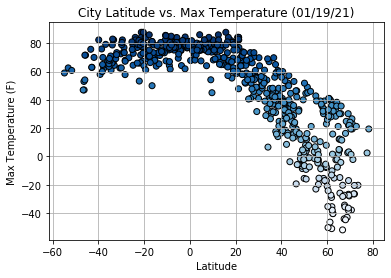

In [10]:
# Plot the DataFrame comparing the column of 'Lat' to 'Max Temp'
x = city_df['Lat']
y = city_df['Max Temp']

# Set color to the value of 'Max Temp' and assign color based on the gradient scale of a colormap
plt.scatter(x, y, c=y, cmap='Blues', edgecolor='black')

#Assign labels, title, and grid
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Title calls on the import datetime dependency to populate current day
plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%x")})')
plt.grid()

plt.show()

## Latitude vs. Humidity Plot

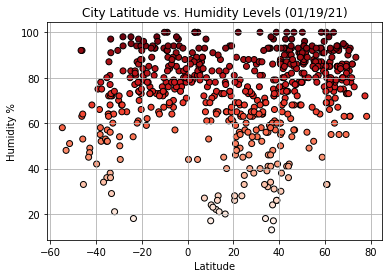

In [11]:
# Plot the DataFrame comparing the column of 'Lat' to 'Max Temp'
x = city_df['Lat']
y = city_df['Humidity']

# Set color to the value of 'Max Temp' and assign color based on the gradient scale of a colormap
plt.scatter(x, y, c=y, cmap='Reds', edgecolor='black')

#Assign labels, title, and grid
plt.xlabel('Latitude')
plt.ylabel('Humidity %')

# Title calls on the import datetime dependency to populate current day
plt.title(f'City Latitude vs. Humidity Levels ({time.strftime("%x")})')
plt.grid()

plt.show()

## Latitude vs. Cloudiness Plot

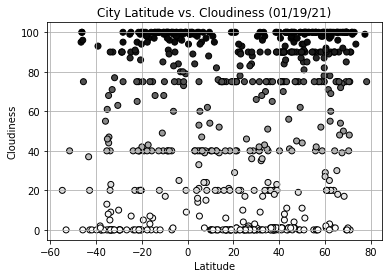

In [12]:
# Plot the DataFrame comparing the column of 'Lat' to 'Max Temp'
x = city_df['Lat']
y = city_df['Cloudiness']

# Set color to the value of 'Max Temp' and assign color based on the gradient scale of a colormap
plt.scatter(x, y, c=y, cmap='Greys', edgecolor='black')

#Assign labels, title, and grid
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Title calls on the import datetime dependency to populate current day
plt.title(f'City Latitude vs. Cloudiness ({time.strftime("%x")})')
plt.grid()

plt.show()

## Latitude vs. Wind Speed Plot

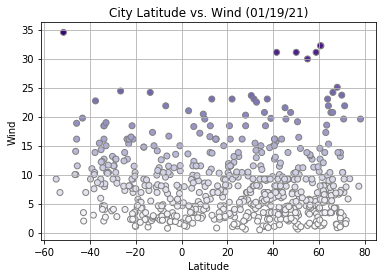

In [27]:
# Plot the DataFrame comparing the column of 'Lat' to 'Max Temp'
x = city_df['Lat']
y = city_df['Wind']

# Set color to the value of 'Max Temp' and assign color based on the gradient scale of a colormap
plt.scatter(x, y, c=y, cmap='Purples', edgecolor='grey')

#Assign labels, title, and grid
plt.xlabel('Latitude')
plt.ylabel('Wind')

# Title calls on the import datetime dependency to populate current day
plt.title(f'City Latitude vs. Wind ({time.strftime("%x")})')
plt.grid()

plt.show()

## Linear Regression

In [28]:
# Create two new dataframes for northern and southern hemispheres

north_hemisphere = (city_df.loc[city_df['Lat']>0])
south_hemisphere = (city_df.loc[city_df['Lat']<0])

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -1.41x + 90.65
The R value (i.e. Coefficient of Correlation) is: -0.8381844143097898
The R squared value (i.e. Coefficient of Determination) is: 0.7025531123918455


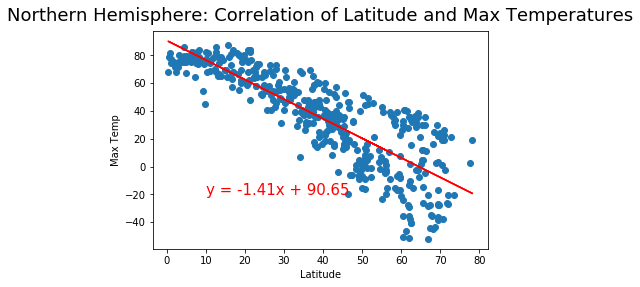

In [29]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemisphere["Lat"],north_hemisphere["Max Temp"])
regress_values = north_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(north_hemisphere["Lat"],north_hemisphere["Max Temp"])
plt.plot(north_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.title("Northern Hemisphere: Correlation of Latitude and Max Temperatures", y=1.02, fontsize=18);
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The R value (i.e. Coefficient of Correlation) is: {rvalue}")
print(f"The R squared value (i.e. Coefficient of Determination) is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.32x + 79.98
The R value (i.e. Coefficient of Correlation) is: 0.5105507097049707
The R squared value (i.e. Coefficient of Determination) is: 0.2606620271802493


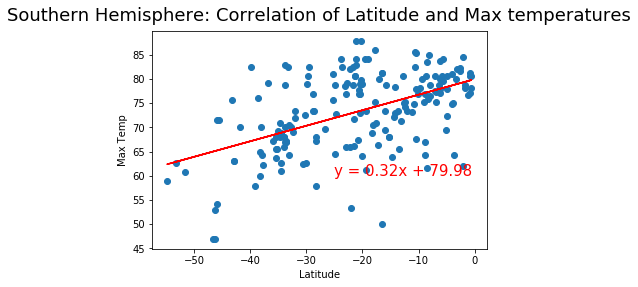

In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemisphere["Lat"],south_hemisphere["Max Temp"])
regress_values = south_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(south_hemisphere["Lat"],south_hemisphere["Max Temp"])
plt.plot(south_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-25,60),fontsize=15,color="red")
plt.title("Southern Hemisphere: Correlation of Latitude and Max temperatures", y=1.02, fontsize=18);
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The R value (i.e. Coefficient of Correlation) is: {rvalue}")
print(f"The R squared value (i.e. Coefficient of Determination) is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.21x + 64.82
The R value (i.e. Coefficient of Correlation) is: 0.22793566454861056
The R squared value (i.e. Coefficient of Determination) is: 0.05195466717321672


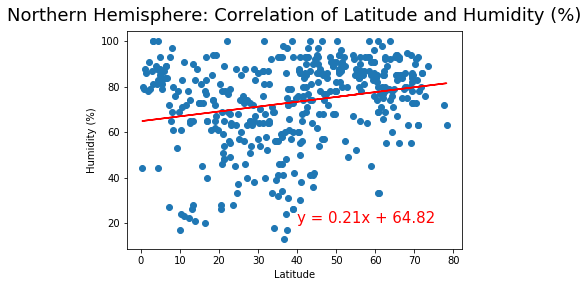

In [17]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemisphere["Lat"],north_hemisphere["Humidity"])
regress_values = north_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(north_hemisphere["Lat"],north_hemisphere["Humidity"])
plt.plot(north_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.title("Northern Hemisphere: Correlation of Latitude and Humidity (%)", y=1.02, fontsize=18);
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The R value (i.e. Coefficient of Correlation) is: {rvalue}")
print(f"The R squared value (i.e. Coefficient of Determination) is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.6x + 87.11
The R value (i.e. Coefficient of Correlation) is: 0.47999120289207414
The R squared value (i.e. Coefficient of Determination) is: 0.2303915548537803


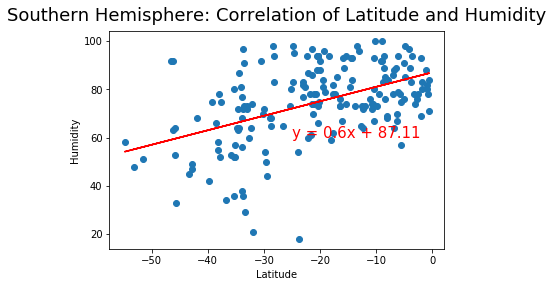

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemisphere["Lat"],south_hemisphere["Humidity"])
regress_values = south_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(south_hemisphere["Lat"],south_hemisphere["Humidity"])
plt.plot(south_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-25,60),fontsize=15,color="red")
plt.title("Southern Hemisphere: Correlation of Latitude and Humidity", y=1.02, fontsize=18);
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The R value (i.e. Coefficient of Correlation) is: {rvalue}")
print(f"The R squared value (i.e. Coefficient of Determination) is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.48x + 35.54
The R value (i.e. Coefficient of Correlation) is: 0.24328041098773617
The R squared value (i.e. Coefficient of Determination) is: 0.059185358370361825


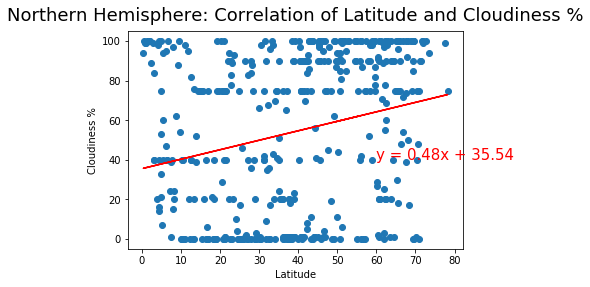

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemisphere["Lat"],north_hemisphere["Cloudiness"])
regress_values = north_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(north_hemisphere["Lat"],north_hemisphere["Cloudiness"])
plt.plot(north_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(60,40),fontsize=15,color="red")
plt.title("Northern Hemisphere: Correlation of Latitude and Cloudiness %", y=1.02, fontsize=18);
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
print(f"The R value (i.e. Coefficient of Correlation) is: {rvalue}")
print(f"The R squared value (i.e. Coefficient of Determination) is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 1.28x + 81.25
The R value (i.e. Coefficient of Correlation) is: 0.41435544611423797
The R squared value (i.e. Coefficient of Determination) is: 0.17169043572452916


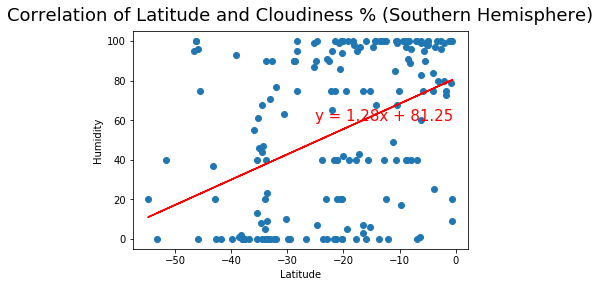

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemisphere["Lat"],south_hemisphere["Cloudiness"])
regress_values = south_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(south_hemisphere["Lat"],south_hemisphere["Cloudiness"])
plt.plot(south_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-25,60),fontsize=15,color="red")
plt.title("Correlation of Latitude and Cloudiness % (Southern Hemisphere)", y=1.02, fontsize=18);
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The R value (i.e. Coefficient of Correlation) is: {rvalue}")
print(f"The R squared value (i.e. Coefficient of Determination) is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.01x + 7.63
The R value (i.e. Coefficient of Correlation) is: 0.03869899106707687
The R squared value (i.e. Coefficient of Determination) is: 0.0014976119096096951


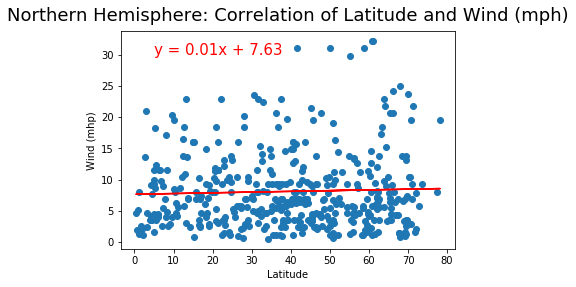

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemisphere["Lat"],north_hemisphere["Wind"])
regress_values = north_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(north_hemisphere["Lat"],north_hemisphere["Wind"])
plt.plot(north_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
plt.title("Northern Hemisphere: Correlation of Latitude and Wind (mph)", y=1.02, fontsize=18);
plt.xlabel('Latitude')
plt.ylabel('Wind (mhp)')
print(f"The R value (i.e. Coefficient of Correlation) is: {rvalue}")
print(f"The R squared value (i.e. Coefficient of Determination) is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.13x + 5.64
The R value (i.e. Coefficient of Correlation) is: -0.3067195184893078
The R squared value (i.e. Coefficient of Determination) is: 0.09407686302231281


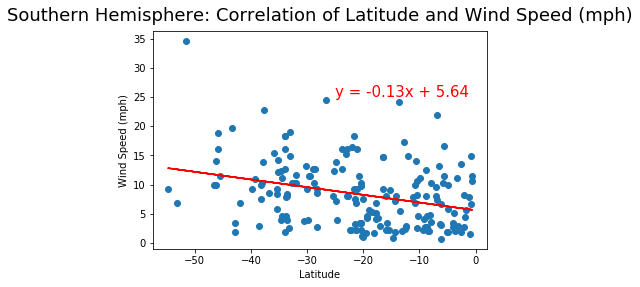

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemisphere["Lat"],south_hemisphere["Wind"])
regress_values = south_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(south_hemisphere["Lat"],south_hemisphere["Wind"])
plt.plot(south_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.title("Southern Hemisphere: Correlation of Latitude and Wind Speed (mph)", y=1.02, fontsize=18);
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The R value (i.e. Coefficient of Correlation) is: {rvalue}")
print(f"The R squared value (i.e. Coefficient of Determination) is: {rvalue**2}")
plt.show()